# ARIMA n SARIMA

## Importing necessary lib and reading the csv file 📚⚙️

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv(r'C:\Users\Windows\Downloads\mock_kaggle.csv')

# EDA 🧹

In [3]:
df.head()


,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [4]:
df.shape


(937, 4)

In [5]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


In [6]:
df.columns

Index(['data', 'venda', 'estoque', 'preco'], dtype='object')

### Renaming the columns 

In [7]:
df.rename(columns={
    'data': 'date',
    'venda': 'sales',
    'estoque': 'stock',
    'preco': 'price'
}, inplace=True)

In [8]:
df.columns

Index(['date', 'sales', 'stock', 'price'], dtype='object')

In [9]:
### Checking for NULL and Duplicates Values ☁️

In [10]:
df.isnull().sum()

date     0
sales    0
stock    0
price    0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
932    False
933    False
934    False
935    False
936    False
Length: 937, dtype: bool

In [12]:
# Converting 'date' to datetime and setting it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

 # Visualising the Sales Data

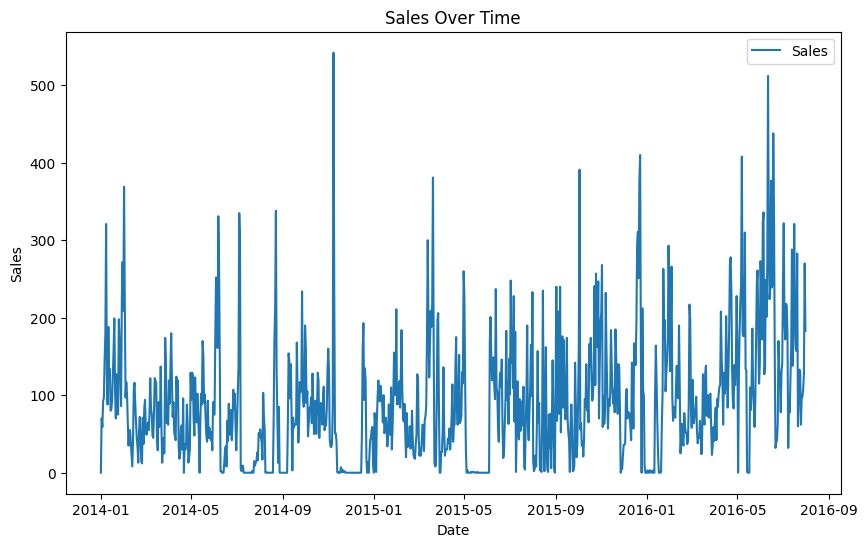

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Applying the ARIMA Model

We will apply the ARIMA model on the sales data. First, you'll need to determine the appropriate order of (p, d, q) parameters.<br>
<br>
Auto-calculate ARIMA order using ACF and PACF (optional)<br>
You can use plots of the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to determine the p and q values.<br>

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

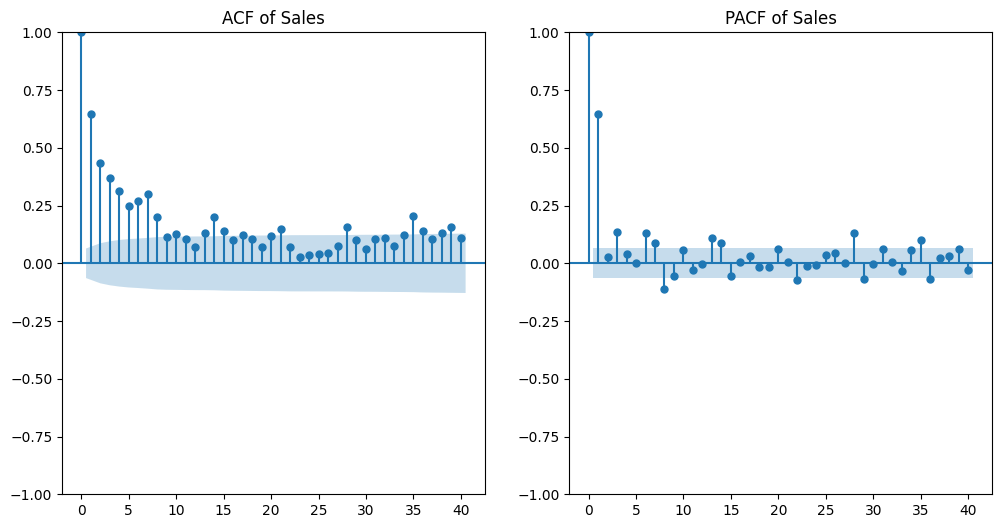

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(df['sales'], lags=40, ax=plt.gca())
plt.title('ACF of Sales')

plt.subplot(122)
plot_pacf(df['sales'], lags=40, ax=plt.gca())
plt.title('PACF of Sales')

plt.show()

C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  937
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5176.376
Date:                Thu, 03 Oct 2024   AIC                          10358.753
Time:                        10:09:11   BIC                          10373.277
Sample:                             0   HQIC                         10364.291
                                - 937                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5874      0.023     25.591      0.000       0.542       0.632
ma.L1         -0.9810      0.006   -155.385      0.000      -0.993      -0.969
sigma2      3716.4611     91.513     40.611      0.0

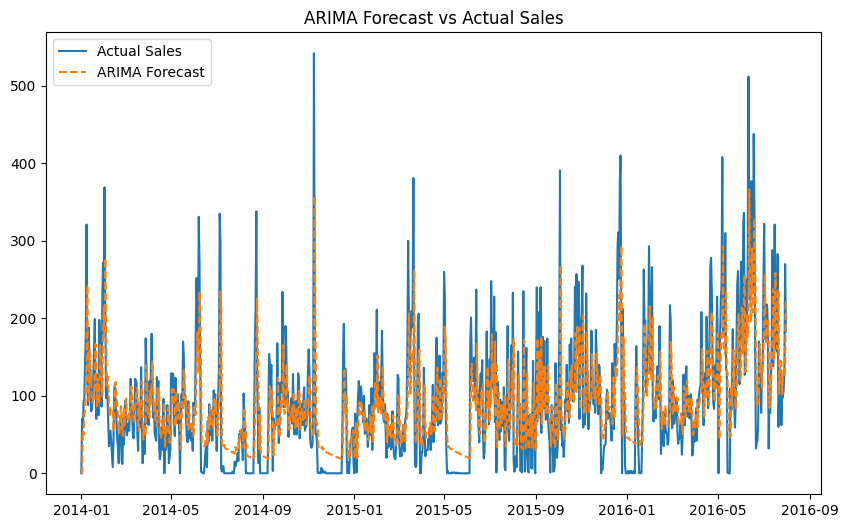

In [16]:
arima_model = ARIMA(df['sales'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Summary of the ARIMA model
print(arima_result.summary())

# Plot the model's predictions
df['arima_forecast'] = arima_result.predict(start=0, end=len(df)-1, dynamic=False)

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(df['arima_forecast'], label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.legend()
plt.show()

# Apply the SARIMA Model 

C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                  937
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5087.482
Date:                           Thu, 03 Oct 2024   AIC                          10184.964
Time:                                   10:09:17   BIC                          10209.134
Sample:                                        0   HQIC                         10194.183
                                           - 937                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6381      0.022     28.730      0.000       0.595       0.682
ma.L1         -0.9931      0.006   -159.032

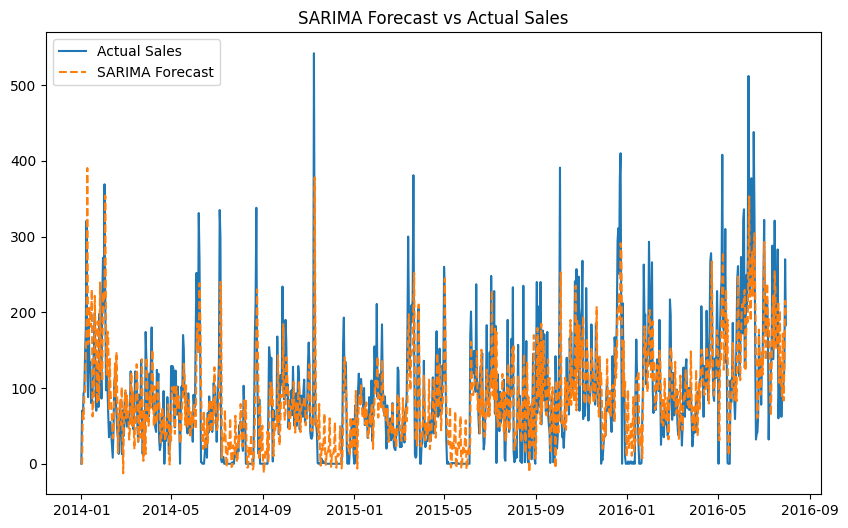

In [17]:
sarima_model = SARIMAX(df['sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit()

# Summary of the SARIMA model
print(sarima_result.summary())

# Plot the SARIMA forecast
df['sarima_forecast'] = sarima_result.predict(start=0, end=len(df)-1, dynamic=False)

plt.figure(figsize=(10,6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(df['sarima_forecast'], label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast vs Actual Sales')
plt.legend()
plt.show()

# Evaluate Model Performance

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics for ARIMA
arima_mse = mean_squared_error(df['sales'], df['arima_forecast'])
arima_mae = mean_absolute_error(df['sales'], df['arima_forecast'])
print(f'ARIMA MSE: {arima_mse}, MAE: {arima_mae}')

# Calculate evaluation metrics for SARIMA (if used)
sarima_mse = mean_squared_error(df['sales'], df['sarima_forecast'])
sarima_mae = mean_absolute_error(df['sales'], df['sarima_forecast'])
print(f'SARIMA MSE: {sarima_mse}, MAE: {sarima_mae}')

ARIMA MSE: 3721.7638901958935, MAE: 43.677450314258024
SARIMA MSE: 3392.549359215089, MAE: 41.26488166858317


# Interpretation of MSE n MAE 

### MSE

•The MSE measures the average squared difference between the actual values and the model's predicted values. Since it squares the errors, it penalizes larger errors more heavily. A lower MSE indicates better model performance.
<br>
<br>
(ˉ▽￣～)In this case, SARIMA has a slightly lower MSE compared to ARIMA, meaning SARIMA fits the data better and makes fewer large errors on average.

### MAE

•The MAE calculates the average absolute difference between the actual values and the predicted values. Unlike MSE, it doesn’t square the errors, so it gives a more straightforward indication of the average error magnitude.<br>
<br>
Again, since SARIMA has a lower MAE than ARIMA, it suggests that the SARIMA model makes smaller errors on average compared to ARIMA.🛠️

# THANK YOU !!! 